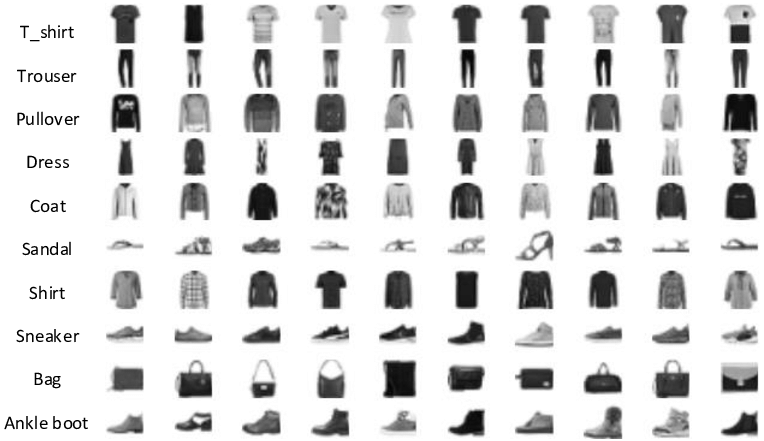

In [ ]:
pip install --user --upgrade numpy

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [8]:
train = pd.read_csv(r"C:\Users\User\Downloads\dataset\fashion-mnist_train.csv")
test = pd.read_csv(r"C:\Users\User\Downloads\dataset\fashion-mnist_test.csv")

In [9]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Division of data and:

In [10]:
x = train.drop(labels = ['label'], axis=1)
y = train.label
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=2)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(45000, 784) (15000, 784)
(45000,) (15000,)


# PCA (cumsum)

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
pca = PCA(n_components=0.90)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [12]:
print (X_train.shape, X_test.shape) 

(45000, 84) (15000, 84)


## KNN:

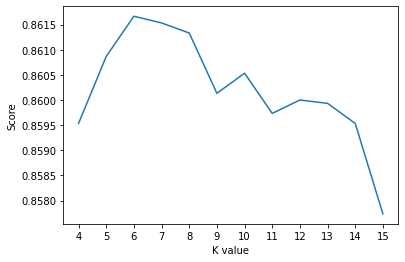

the maximum KNN score is: 86.16666666666667% while k=6


In [26]:
from sklearn.neighbors import KNeighborsClassifier
arr = []
for i in range(4,16):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_test)
    arr.append(accuracy_score(y_test, knn_predict))
    
plt.plot(range(4,16), arr)
plt.xticks(np.arange(4,16,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

knn_accuracy = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=6")

## Decision Tree:

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_predict)*100
print ("Decision Tree accuracy: " + str(clf_accuracy) + "%")

Decision Tree accuracy: 76.36%


## Random Forest:

In [14]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(max_depth=10)
ran.fit(X_train, y_train)
ran_predict = ran.predict(X_test)
ran_accuracy = accuracy_score(y_test, ran_predict)*100
print ("random forest accuracy: " + str(ran_accuracy) + "%")

random forest accuracy: 82.67999999999999%


## AdaBoost:

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=1000, random_state=0)
ada_predict = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predict)*100
print ("AdaBoost accuracy: " + str(ada_accuracy) + "%")

AdaBoost accuracy: 57.013333333333335%


## XGBoost:

In [19]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predict)*100
print ("XGBoost accuracy: " + str(xgb_accuracy) + "%")

XGBoost accuracy: 87.92666666666666%


## Pipeline:

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_train, y_train)
pip_predict = pip.predict(X_test)
pip_accuracy = accuracy_score(y_test, pip_predict)*100
print ("Pipeline accuracy: " + str(pip_accuracy) + "%")

Pipeline accuracy: 89.56%


## Stacking:

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
sta = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
sta.fit(X_train, y_train)
sta_predict = sta.predict(X_test)
sta_accuracy = accuracy_score(y_test, sta_predict)*100
print ("Stacking accuracy: " + str(sta_accuracy) + "%")

Stacking accuracy: 85.70666666666666%


## Voting:

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree
clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
vot.fit(X_train, y_train)
vot_predict = vot.predict(X_test)
vot_accuracy = accuracy_score(y_test, vot_predict)*100
print ("Voting accuracy: " + str(vot_accuracy) + "%")

Voting accuracy: 85.40666666666667%


## KMeans:

In [23]:
from sklearn.cluster import KMeans
kme = KMeans(n_clusters=10)
kme.fit(X_train, y_train)
kme_predict = kme.predict(X_test)
kme_accuracy = accuracy_score(y_test, kme_predict)*100
print ("KMeans accuracy: " + str(kme_accuracy) + "%")

KMeans accuracy: 10.933333333333334%


# Comparison between the models after PCA 138:

Text(0, 0.5, 'Accuracy (%)')

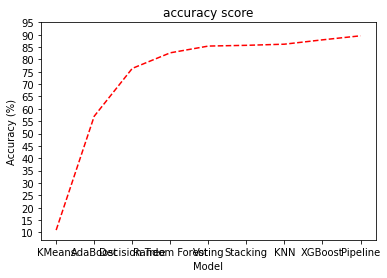

In [27]:
arrX = ['KMeans', 'AdaBoost','Decision Tree', 'Random Forest', 'Voting', 'Stacking', 'KNN', 'XGBoost', 'Pipeline']
arrY = [kme_accuracy, ada_accuracy, clf_accuracy, ran_accuracy, vot_accuracy, sta_accuracy, knn_accuracy, xgb_accuracy, pip_accuracy]
plt.plot (arrX, arrY, 'r--')
plt.title('accuracy score')
plt.yticks(np.arange(10,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")

I will show the confusion metrix of the 4 models with the best accuracies after pca 84:

# confusion_matrix after PCA 84:

In [28]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

from sklearn import metrics
pip_confusion = metrics.confusion_matrix(y_test, pip_predict)
xgb_confusion = metrics.confusion_matrix(y_test, xgb_predict)
knn_confusion = metrics.confusion_matrix(y_test, knn_predict)
sta_confusion = metrics.confusion_matrix(y_test, sta_predict)

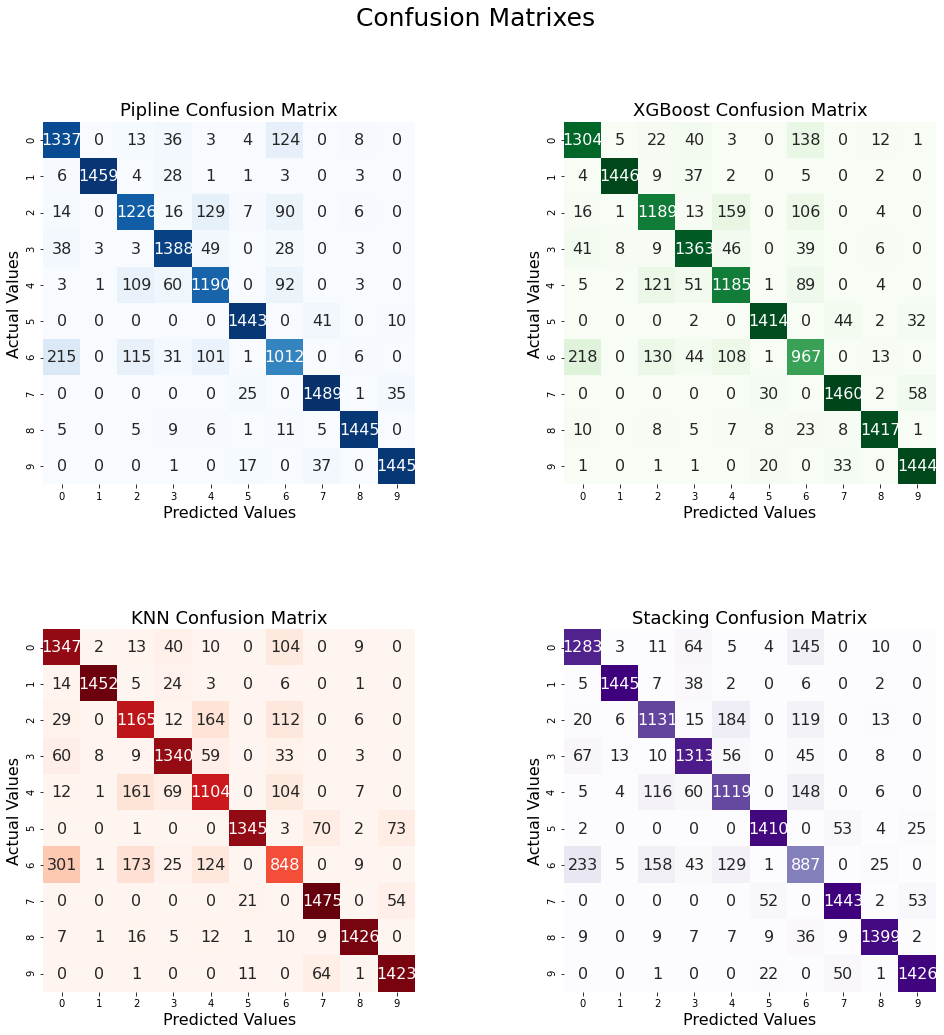

In [36]:
plt.figure(figsize=(16,16))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Pipline Confusion Matrix",fontsize=18)
sns.heatmap(pip_confusion,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("XGBoost Confusion Matrix",fontsize=18)
sns.heatmap(xgb_confusion,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("KNN Confusion Matrix",fontsize=18)
sns.heatmap(knn_confusion,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("Stacking Confusion Matrix",fontsize=18)
sns.heatmap(sta_confusion,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.show()

#### I will check in a loop on the 5 models with the best accuracy the PCA in the range 20-30:
#### To check if it is worth lowering the amount of columns and there will be an accuracy that is good

## Voting:

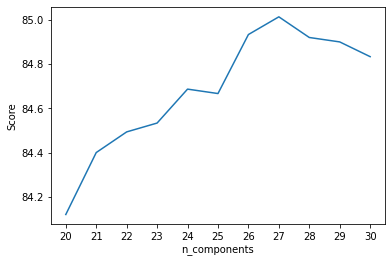

the maximum Voting score is: 85.01333333333334% while n_components=29


In [51]:
arr = []
for i in range(20,31):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
    vot.fit(X_train, y_train)
    vot_predict = vot.predict(X_test)
    arr.append(accuracy_score(y_test, vot_predict)*100)

# Graph showing accuracy:
plt.plot(range(20,31), arr)
plt.xticks(np.arange(20,31,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

vot_pca = max(arr)
print ("the maximum Voting score is: " + str(vot_pca) + "% while n_components=29")

## Stacking:

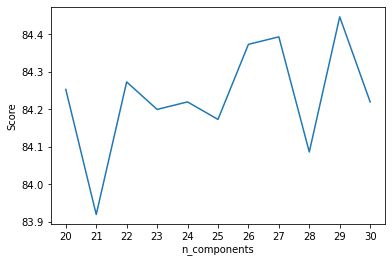

the maximum Stacking score is: 84.44666666666667% while n_components=30


In [50]:
arr = []
for i in range(20,31):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
    sta = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
    sta.fit(X_train, y_train)
    sta_predict = sta.predict(X_test)
    arr.append(accuracy_score(y_test, sta_predict)*100)

# Graph showing accuracy:
plt.plot(range(20,31), arr)
plt.xticks(np.arange(20,31,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

sta_pca = max(arr)
print ("the maximum Stacking score is: " + str(sta_pca) + "% while n_components=30")

## KNN:

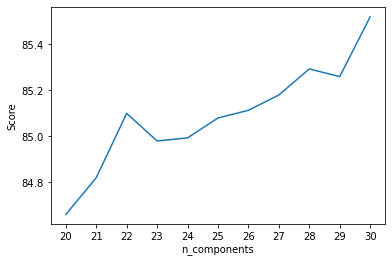

the maximum KNN score is: 85.52% while n_components=28


In [48]:
arr = []
for i in range(20,31):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    knn = KNeighborsClassifier(n_neighbors = 6)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_test)
    arr.append(accuracy_score(y_test, knn_predict)*100)

# Graph showing accuracy:
plt.plot(range(20,31), arr)
plt.xticks(np.arange(20,31,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

knn_pca = max(arr)
print ("the maximum KNN score is: " + str(knn_pca) + "% while n_components=28")

## XGBoost:

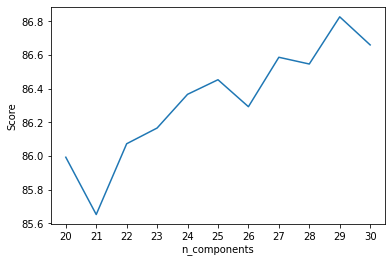

the maximum XGBoost score is: 86.82666666666667% while n_components=26


In [52]:
arr = []
for i in range(20,31):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    xgb = XGBClassifier(eval_metric='mlogloss')
    xgb.fit(X_train, y_train)
    xgb_predict = xgb.predict(X_test)
    arr.append(accuracy_score(y_test, xgb_predict)*100)

# Graph showing accuracy:
plt.plot(range(20,31), arr)
plt.xticks(np.arange(20,31,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

xgb_pca = max(arr)
print ("the maximum XGBoost score is: " + str(xgb_pca) + "% while n_components=26")

## Pipline:

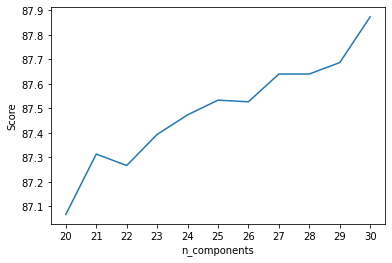

the maximum Pipline score is: 87.87333333333333% while n_components=30


In [49]:
arr = []
for i in range(20,31):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    pip.fit(X_train, y_train)
    pip_predict = pip.predict(X_test)
    arr.append(accuracy_score(y_test, pip_predict)*100)

# Graph showing accuracy:
plt.plot(range(20,31), arr)
plt.xticks(np.arange(20,31,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

pip_pca = max(arr)
print ("the maximum Pipline score is: " + str(pip_pca) + "% while n_components=30")

## Comparison between the models after PCA 84 and after lowest PCA:

Text(0, 0.5, 'Accuracy (%)')

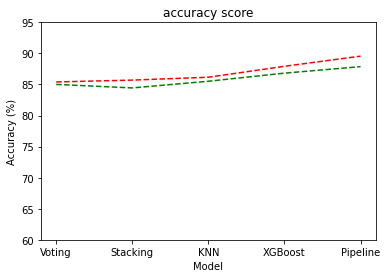

In [54]:
arrX = ['Voting', 'Stacking', 'KNN', 'XGBoost', 'Pipeline']
arrY = [vot_accuracy, sta_accuracy, knn_accuracy, xgb_accuracy, pip_accuracy]
arrY2 = [vot_pca, sta_pca, knn_pca, xgb_pca, pip_pca]
plt.plot (arrX, arrY, 'r--')
plt.plot (arrX, arrY2, 'g--')
plt.title('accuracy score')
plt.yticks(np.arange(60,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
# The red line shows the accuracy of the 5 best models after pca 84.
# The green line shows the accuracy after smaller pca.

It can be seen that in the model with the best accuracy there is a difference of about 1% between the model after pca 84 and after pca lower.

I will show the confusion metrix of the 4 models with the best accuracies after lower pca:

# confusion_matrix after lower pca:

In [53]:
pca = PCA(n_components = 30)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
pip.fit(X_train, y_train)
pip_predict2 = pip.predict(X_test)
pip_confusion2 = metrics.confusion_matrix(y_test, pip_predict2)

pca = PCA(n_components = 26)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_predict2 = xgb.predict(X_test)
xgb_confusion2 = metrics.confusion_matrix(y_test, xgb_predict2)

pca = PCA(n_components = 28)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
knn.fit(X_train, y_train)
knn_predict2 = knn.predict(X_test)
knn_confusion2 = metrics.confusion_matrix(y_test, knn_predict2)

pca = PCA(n_components = 29)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
vot.fit(X_train, y_train)
vot_predict2 = vot.predict(X_test)
vot_confusion2 = metrics.confusion_matrix(y_test, vot_predict2)

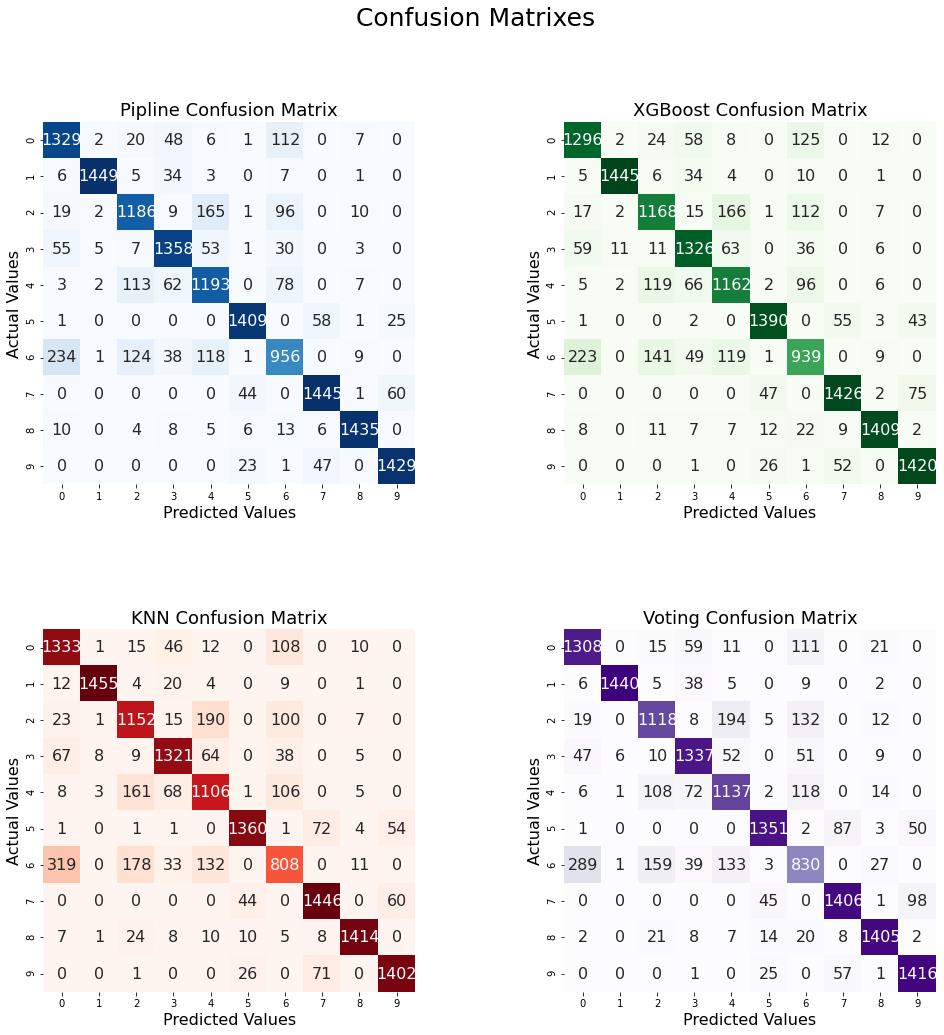

In [55]:
plt.figure(figsize=(16,16))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Pipline Confusion Matrix",fontsize=18)
sns.heatmap(pip_confusion2,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("XGBoost Confusion Matrix",fontsize=18)
sns.heatmap(xgb_confusion2,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("KNN Confusion Matrix",fontsize=18)
sns.heatmap(knn_confusion2,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("Voting Confusion Matrix",fontsize=18)
sns.heatmap(vot_confusion2,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.show()

By comparison of all models, the best model is a pipline with pca 84.
### We will see how it works on the final test:

In [56]:
X_Test = test.drop(labels = ['label'], axis=1)
Y_Test = test.label

In [57]:
pca = PCA(n_components = 84)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_train, y_train)
pip_predict3 = pip.predict(X_test)
pip_accuracy3 = accuracy_score(y_test, pip_predict3)*100
print ("Pipeline accuracy: " + str(pip_accuracy3) + "%")

Pipeline accuracy: 89.54666666666667%


However, if we prefer efficiency over accuracy, we should lower the pca to 30 in the same model and get a precision that is about 2% lower.

In [58]:
pca = PCA(n_components = 30)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_train, y_train)
pip_predict3 = pip.predict(X_test)
pip_accuracy3 = accuracy_score(y_test, pip_predict3)*100
print ("Pipeline accuracy: " + str(pip_accuracy3) + "%")

Pipeline accuracy: 87.89333333333333%
